# Logistic Regression: 
## Predict whether a person makes over 50K per year using the Census Income Data Set

### Train Data Set
Obtain & Clean

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.getcwd()

df = pd.read_csv("/Users/zhanebennett/Downloads/Adult//adult.data", header=None)
df = df.iloc[0:16281]  #train and test datasets need to be the same size
df.head(8)     # with this command you can see your file

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


In [2]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
             'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


Explore

In [3]:
age = df['age']
income = df['income']
print(age.head(1), "\n", income.head(1))

0    39
Name: age, dtype: int64 
 0     <=50K
Name: income, dtype: object


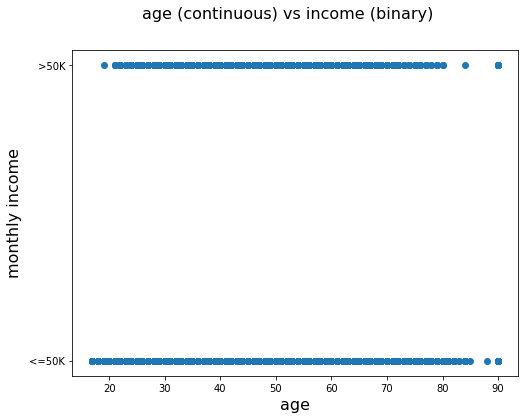

In [4]:
fig = plt.figure(figsize=(8,6))
fig.suptitle('age (continuous) vs income (binary)', fontsize=16)
plt.scatter(age, income);
plt.xlabel("age", fontsize=16)
plt.ylabel("monthly income", fontsize=16)
plt.show();

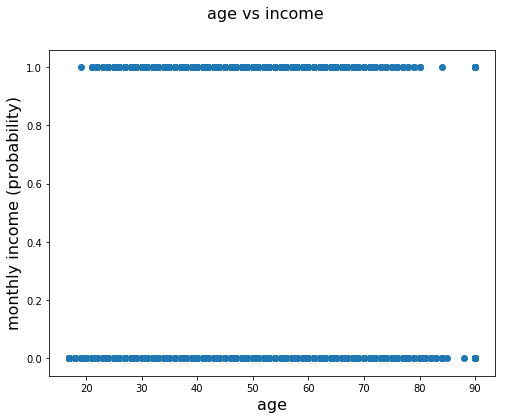

In [5]:
income_bin = income == " >50K"
income_bin = income_bin.astype(int)
income_bin.head()
fig = plt.figure(figsize=(8,6))
fig.suptitle("age vs income", fontsize=16)
plt.scatter(age, income_bin)
plt.xlabel("age", fontsize=16)
plt.ylabel("monthly income (probability)", fontsize=16);

Model

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

regr = LogisticRegression(C=1e5, solver='lbfgs')
age = age.values  #turns series object into an array object
age = age.reshape(-1, 1)
model_log = regr.fit(age, income_bin)
print(model_log)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


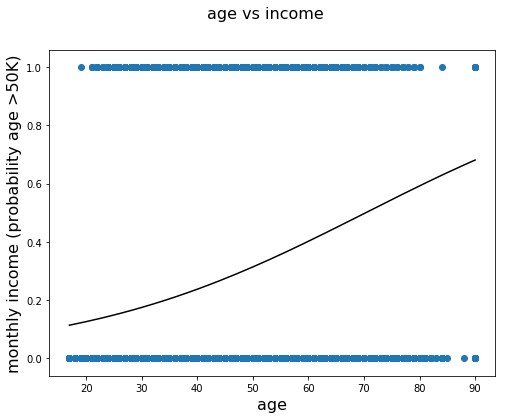

In [7]:
coef = regr.coef_
interc = regr.intercept_

lin_pred = (age * coef + interc)    #linear prefictor
mod_income = 1 / ( 1+ np.exp(-lin_pred))  #log transformation
age_ordered, mod_income_ordered = zip(*sorted(zip(age, mod_income.ravel()), key=lambda x:x[0]))

fig = plt.figure(figsize=(8,6))
fig.suptitle("age vs income", fontsize=16)
plt.scatter(age, income_bin)
plt.xlabel("age", fontsize=16)
plt.ylabel("monthly income (probability age >50K)", fontsize=16);
plt.plot(age_ordered, mod_income_ordered, c="black")
plt.show()

### Test Data Set

In [8]:
df_test = pd.read_csv("/Users/zhanebennett/Downloads/Adult//adult.test", header=None)

df_test.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
             'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

age_test = df_test['age']
print(age_test.head(2))
income_test = df_test['income']
print(income_test.head(2))

income_bin_test = income_test == " >50K."
income_bin_test = income_bin_test.astype(int)

0    25
1    38
Name: age, dtype: int64
0     <=50K.
1     <=50K.
Name: income, dtype: object


In [9]:
age_test = age_test.values  #turns series object into an array object
age_test = age_test.reshape(-1, 1)

In [10]:
#df.shape[0] != df_test.shape[0]

regr_test = LogisticRegression(fit_intercept = False, C = 1e12, solver='lbfgs')
model_log_test = regr_test.fit(age, income_bin)
print(model_log_test)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [11]:
y_hat_test = regr.predict(age_test)
y_hat_test = pd.Series(y_hat_test)

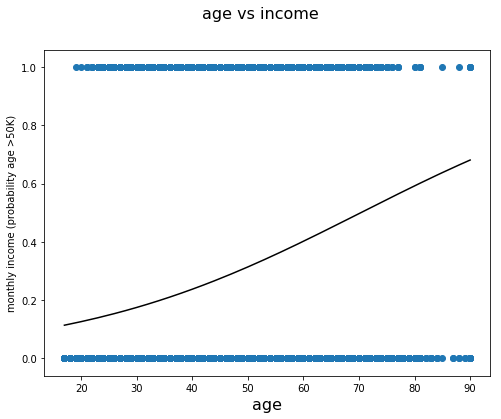

In [12]:
coef = regr.coef_
interc = regr.intercept_

lin_pred = (age * coef + interc)    #linear prefictor
mod_income = 1 / ( 1+ np.exp(-lin_pred))  #log transformation
age_ordered, mod_income_ordered = zip(*sorted(zip(age, mod_income.ravel()), key=lambda x:x[0]))

fig = plt.figure(figsize=(8,6))
fig.suptitle("age vs income", fontsize=16)
plt.scatter(age_test, income_bin_test)
plt.xlabel("age", fontsize=16)
plt.ylabel("monthly income (probability age >50K)");
plt.plot(age_ordered, mod_income_ordered, c="black")
plt.show()

### Evaluation of model accuracty with AUROC Metric

In [13]:
from sklearn.metrics import roc_curve, auc

y_score = regr.fit(age, income_bin).decision_function(age_test)

In [14]:
fpr, tpr, thresholds = roc_curve(income_bin_test, y_score)

In [15]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.6783597431553071


AUC: 0.6783597431553071


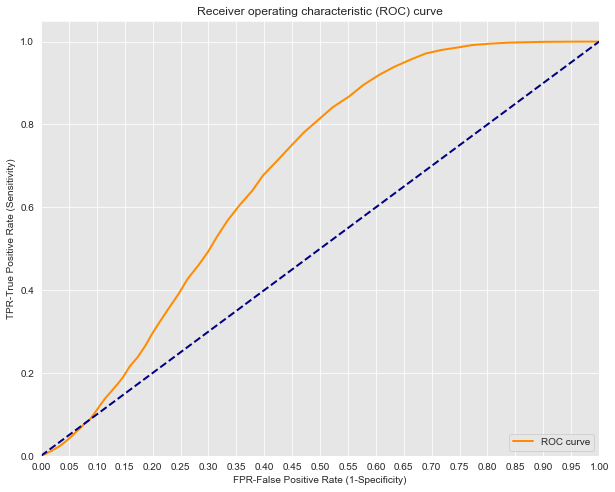

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))

plt.figure(figsize=(10,8))
lw=2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')   #line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('FPR-False Positive Rate (1-Specificity)') 
plt.ylabel('TPR-True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

### Evaluation of model accuracty with F1-Score Metric
Precision, Recall, Accuracy (finding inverse to emphasize negative cases)

In [17]:
y_true = income_bin_test #true target values
y_pred = pd.Series(y_hat_test) #estimated target values

y_true_inverse = (income_bin_test.values - 1) * -1 #true target values negative case
y_pred_inverse = (y_hat_test.values - 1) * -1 #estimated target values negative case

In [18]:
def conf_matrix(y_true, y_pred):
    cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    
    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            # CASE: TP 
            if label == pred:
                cm['TP'] += 1
            # CASE: FN
            else:
                cm['FN'] += 1
        else:
            # CASE: TN
            if label == pred:
                cm['TN'] += 1
            # CASE: FP
            else:
                cm['FP'] += 1
    return cm

In [19]:
cm = conf_matrix(y_true, y_pred)
cm_inverse = conf_matrix(y_true_inverse, y_pred_inverse) #TN becomes TP
print(cm,'\n', cm_inverse)

{'TP': 57, 'TN': 12164, 'FP': 271, 'FN': 3789} 
 {'TP': 12164, 'TN': 57, 'FP': 3789, 'FN': 271}


In [20]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#%matplotlib inline

def show_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

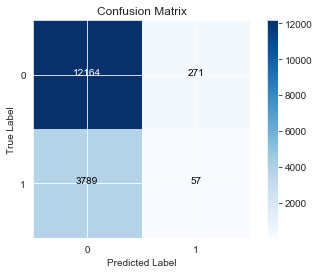

In [21]:
show_cf(y_true, y_pred, class_names=None, model_name=None)

In [22]:
from sklearn.metrics import classification_report

preds = [y_pred]

for ind, i in enumerate(preds):
    print('-'*40)
    print("Model {} Classification Report:".format(ind + 1))
    print(classification_report(y_true, i))

----------------------------------------
Model 1 Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.98      0.86     12435
           1       0.17      0.01      0.03      3846

    accuracy                           0.75     16281
   macro avg       0.47      0.50      0.44     16281
weighted avg       0.62      0.75      0.66     16281



### Classification Imbalance
The majority makes under 50K, while the minority makes over 50K. I'm more interested in detecting if people making over 50K. 

Having an imbalance in classes can lead to useless results if I'm trying to detect a minority case.
My accuracy is 75%, but it could be that I'm predicting Class 0 every time. 
Class 0: 76% 
Class 1: 24%

My recall, or TPR, is very low. Mitigating class imbalance can drastically improve recall, while only lowering accuracy by a little bit.
There's a tradeoff when it comes to detection-- a tradeoff between precision and recall.
Recall is more important. 
Recall is the rate of truly positive cases that were caught.
Precision is the rate of positive catches that were actually positive.
It is more expensive to miss a positive case than to falsly label a negative one as positive when it comes to detecting a minority class. (i.e. fraud)

Precision is more about how well I guessed out of the ones that I guessed.
Recall is more about how well I guessed in general--what % of positives (or negatives) did I capture out of the general pool?

In [23]:
a = list(y_true)
b = list(y_pred)
print(a.count(0), a.count(1), a.count(0) + a.count(1)) # total neg. and pos. cases in y_true
print(b.count(0), b.count(1), b.count(0) + b.count(1)) # total neg. and pos. cases in y_pred

print(a.count(0)/(a.count(0) + a.count(1))*100,'%')
print(a.count(1)/(a.count(0) + a.count(1))*100,'%')

def accuracy(confusion_matrix):
    return (confusion_matrix['TP'] + confusion_matrix['TN']) / sum(confusion_matrix.values())
def recall(confusion_matrix):
    return confusion_matrix['TP'] / (confusion_matrix['TP'] + confusion_matrix['FN'])

print("Accuracy:", accuracy(cm))
print("Recall:", recall(cm))

12435 3846 16281
15953 328 16281
76.3773723972729 %
23.622627602727107 %
Accuracy: 0.750629568208341
Recall: 0.014820592823712949


#### SMOTE

In [24]:
#!pip install -U imbalanced-learn
#!pip install imblearn 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X_train = age
y_train = income_bin
X_test = age_test
print (y_train.value_counts(), '\n')

sm = SMOTE()
X_train, y_train = sm.fit_sample(X_train, y_train)
print(np.bincount(y_train)) #minority class has been increased to the total number of majority class

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

cm = conf_matrix(y_true, y_pred)
print(cm)
print("Accuracy:", accuracy(cm))
print("Recall:", recall(cm))

preds = [y_pred]

for ind, i in enumerate(preds):
    print('-'*40)
    print("Model {} Classification Report:".format(ind + 1))
    print(classification_report(y_true, i))

0    12384
1     3897
Name: income, dtype: int64 

[12384 12384]
{'TP': 2333, 'TN': 8000, 'FP': 4435, 'FN': 1513}
Accuracy: 0.6346661752963577
Recall: 0.6066042641705668
----------------------------------------
Model 1 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.64      0.73     12435
           1       0.34      0.61      0.44      3846

    accuracy                           0.63     16281
   macro avg       0.59      0.62      0.58     16281
weighted avg       0.72      0.63      0.66     16281



#### NearMiss

In [25]:
from imblearn.under_sampling import NearMiss

X_train = age
y_train = income_bin
X_test = age_test
print (y_train.value_counts(), '\n')

nr = NearMiss()
X_train, y_train = nr.fit_sample(X_train, y_train)

print(np.bincount(y_train))

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

cm = conf_matrix(y_true, y_pred)
print(cm)
print("Accuracy:", accuracy(cm))
print("Recall:", recall(cm))

preds = [y_pred]

for ind, i in enumerate(preds):
    print('-'*40)
    print("Model {} Classification Report:".format(ind + 1))
    print(classification_report(y_true, i))

0    12384
1     3897
Name: income, dtype: int64 

[3897 3897]
{'TP': 2185, 'TN': 8279, 'FP': 4156, 'FN': 1661}
Accuracy: 0.6427123641053989
Recall: 0.5681227249089964
----------------------------------------
Model 1 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74     12435
           1       0.34      0.57      0.43      3846

    accuracy                           0.64     16281
   macro avg       0.59      0.62      0.58     16281
weighted avg       0.72      0.64      0.67     16281



Interpret

Oversampling and undersampling methods lower accuracy, but have a greater recall.
SMOTE has a lower accuracy than NearMiss, but a higher recall for the minority case, so I would use it for reducing class imbalance when detecting instances of the minority case is the priority.

Overall. the model has a weighted average precision of .72, recall of .63, and F-1 score of .66